## Imports

In [142]:
import pandas as pd
import geopandas as gpd
import matplotlib
import numpy as np
%matplotlib inline
from shapely import wkt
import seaborn as sns
from sklearn.preprocessing import RobustScaler,OneHotEncoder,Normalizer, MinMaxScaler
import statsmodels.api as sm

## Load London Boroughs Mapping

In [11]:
borough_csv = "london_boroughs_201908220130.csv"
borough_df = pd.read_csv(borough_csv)
borough_df['wkb_geometry'] = borough_df['wkb_geometry'].apply(wkt.loads)
borough_gdf = gpd.GeoDataFrame(borough_df, geometry ="wkb_geometry" )

In [13]:
borough_gdf.head()

,ogc_fid,name,cartodb_id,created_at,updated_at,wkb_geometry
0,1,Barking and Dagenham,1,2015-07-01 10:57:45,2015-07-01 10:57:45,"MULTIPOLYGON (((0.14821 51.59963, 0.14820 51.5..."
1,2,Barnet,2,2015-07-01 10:57:45,2015-07-01 10:57:45,"MULTIPOLYGON (((-0.18336 51.66868, -0.18338 51..."
2,3,Bexley,3,2015-07-01 10:57:45,2015-07-01 10:57:45,"MULTIPOLYGON (((0.15804 51.50904, 0.15631 51.5..."
3,4,Brent,4,2015-07-01 10:57:45,2015-07-01 10:57:45,"MULTIPOLYGON (((-0.21214 51.55558, -0.21269 51..."
4,5,Bromley,5,2015-07-01 10:57:45,2015-07-01 10:57:45,"MULTIPOLYGON (((0.07646 51.43100, 0.07593 51.4..."


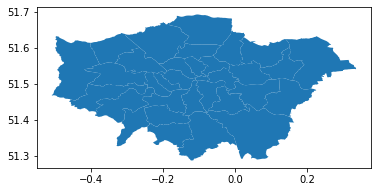

In [15]:
borough_gdf.plot()

## London Borough Data

In [79]:
cols = ['Area name','GLA Population Estimate 2017','GLA Household Estimate 2017','Population density (per hectare) 2017',
        'Average Age, 2017','Employment rate (%) (2015)','Modelled Household median income estimates 2012/13',
        'Crime rates per thousand population 2014/15','Median House Price, 2015',
       'New Homes (net) 2015/16 (provisional)','Life satisfaction score 2011-14 (out of 10)']
df_london_stats = pd.read_excel('london-borough-profiles.xlsx', sheet_name= 'Data', na_values='.', nrows=34, header=[0], usecols=cols)
df_london_stats = df_london_stats[1:]
df_london_stats 

,Area name,GLA Population Estimate 2017,GLA Household Estimate 2017,Population density (per hectare) 2017,"Average Age, 2017",Employment rate (%) (2015),Modelled Household median income estimates 2012/13,Crime rates per thousand population 2014/15,"Median House Price, 2015",New Homes (net) 2015/16 (provisional),Life satisfaction score 2011-14 (out of 10)
1,City of London,8800.0,5325.817690,30.303719,43.2,64.6,63620.0,NaN,799999.0,80.0,6.59
2,Barking and Dagenham,209000.0,78188.376723,57.882203,32.9,65.8,29420.0,83.359060,243500.0,730.0,7.14
3,Barnet,389600.0,151422.963691,44.911536,37.3,68.5,40530.0,62.738426,445000.0,1460.0,7.48
4,Bexley,244300.0,97735.840946,40.326396,39.0,75.1,36990.0,51.827942,275000.0,-130.0,7.38
5,Brent,332100.0,121048.274678,76.816966,35.6,69.5,32140.0,78.801881,407250.0,1050.0,7.25
6,Bromley,327900.0,140602.291301,21.840359,40.2,75.3,43060.0,64.133577,374975.0,700.0,7.54
7,Camden,242500.0,107654.135265,111.293183,36.4,69.2,43750.0,123.498709,700000.0,970.0,7.14
8,Croydon,386500.0,159010.065250,44.680203,37.0,75.4,37000.0,77.035133,300000.0,2040.0,7.10
9,Ealing,351600.0,132662.966475,63.300819,36.2,72.7,36070.0,75.475775,430000.0,720.0,7.29
10,Enfield,333000.0,130327.742191,41.196571,36.3,73.0,33110.0,69.373900,320000.0,670.0,7.26


In [80]:
df_london_stats.columns

Index(['Area name', 'GLA Population Estimate 2017',
       'GLA Household Estimate 2017', 'Population density (per hectare) 2017',
       'Average Age, 2017', 'Employment rate (%) (2015)',
       'Modelled Household median income estimates 2012/13',
       'Crime rates per thousand population 2014/15',
       'Median House Price, 2015', 'New Homes (net) 2015/16 (provisional)',
       'Life satisfaction score 2011-14 (out of 10)'],
      dtype='object')

In [81]:
df_london_stats.isnull().sum()

Area name                                             0
GLA Population Estimate 2017                          0
GLA Household Estimate 2017                           0
Population density (per hectare) 2017                 0
Average Age, 2017                                     0
Employment rate (%) (2015)                            0
Modelled Household median income estimates 2012/13    0
Crime rates per thousand population 2014/15           1
Median House Price, 2015                              0
New Homes (net) 2015/16 (provisional)                 0
Life satisfaction score 2011-14 (out of 10)           0
dtype: int64

Fill Null with mean

In [82]:
df_london_stats['Crime rates per thousand population 2014/15'] = df_london_stats['Crime rates per thousand population 2014/15'].fillna(df_london_stats['Crime rates per thousand population 2014/15'].mean())

Scale the statisitcs

In [91]:
scalar = MinMaxScaler()

#df_london_stats =
#df_london_stats_scaled = scalar.fit_transform(df_london_stats)
#df[df.columns] = scaler.fit_transform(df[df.columns])
df_london_stats['Population_scaled'] = scalar.fit_transform(df_london_stats[['GLA Population Estimate 2017']])
df_london_stats['Household_scaled'] = scalar.fit_transform(df_london_stats[['GLA Household Estimate 2017']])
df_london_stats['Density_scaled'] = scalar.fit_transform(df_london_stats[['Population density (per hectare) 2017']])
df_london_stats['Age_scaled'] = scalar.fit_transform(df_london_stats[['Average Age, 2017']])
df_london_stats['Employment_scaled'] = scalar.fit_transform(df_london_stats[['Employment rate (%) (2015)']])
df_london_stats['Income_scaled'] = scalar.fit_transform(df_london_stats[['Modelled Household median income estimates 2012/13']])
df_london_stats['Crime_scaled'] = scalar.fit_transform(df_london_stats[['Crime rates per thousand population 2014/15']])
df_london_stats['House_Price_scaled'] = scalar.fit_transform(df_london_stats[['Median House Price, 2015']])
df_london_stats['New_Homes_scaled'] = scalar.fit_transform(df_london_stats[['New Homes (net) 2015/16 (provisional)']])
df_london_stats['Satisfaction_scaled'] = scalar.fit_transform(df_london_stats[['Life satisfaction score 2011-14 (out of 10)']])

In [177]:
df_london_stats_scaled = df_london_stats.drop(columns=['GLA Population Estimate 2017',
       'GLA Household Estimate 2017', 'Population density (per hectare) 2017',
       'Average Age, 2017', 'Employment rate (%) (2015)',
       'Modelled Household median income estimates 2012/13',
       'Crime rates per thousand population 2014/15',
    #   'Median House Price, 2015', 
    'New Homes (net) 2015/16 (provisional)',
       'Life satisfaction score 2011-14 (out of 10)'])

In [178]:
df_london_stats_scaled

,Area name,"Median House Price, 2015",Population_scaled,Household_scaled,Density_scaled,Age_scaled,Employment_scaled,Income_scaled,Crime_scaled,House_Price_scaled,New_Homes_scaled,Satisfaction_scaled
1,City of London,799999.0,0.000000,0.000000,0.063263,1.000000,0.000000,1.000000,0.212800,0.581808,0.073171,0.000000
2,Barking and Dagenham,243500.0,0.525735,0.474106,0.269411,0.127119,0.080000,0.018370,0.203454,0.000000,0.299652,0.539216
3,Barnet,445000.0,1.000000,0.950632,0.172456,0.500000,0.260000,0.337256,0.076179,0.210664,0.554007,0.872549
4,Bexley,275000.0,0.618435,0.601298,0.138182,0.644068,0.700000,0.235649,0.008838,0.032933,0.000000,0.774510
5,Brent,407250.0,0.849002,0.752988,0.410947,0.355932,0.326667,0.096441,0.175326,0.171197,0.411150,0.647059
6,Bromley,374975.0,0.837973,0.880223,0.000000,0.745763,0.713333,0.409874,0.084790,0.137454,0.289199,0.931373
7,Camden,700000.0,0.613708,0.665835,0.668656,0.423729,0.306667,0.429679,0.451203,0.477261,0.383275,0.539216
8,Croydon,300000.0,0.991859,1.000000,0.170727,0.474576,0.720000,0.235936,0.164421,0.059070,0.756098,0.500000
9,Ealing,430000.0,0.900210,0.828563,0.309915,0.406780,0.540000,0.209242,0.154797,0.194982,0.296167,0.686275
10,Enfield,320000.0,0.851366,0.813368,0.144687,0.415254,0.560000,0.124282,0.117135,0.079979,0.278746,0.656863


In [148]:
df_london_stats_scaled.columns

Index(['Area name', 'Population_scaled', 'Household_scaled', 'Density_scaled',
       'Age_scaled', 'Employment_scaled', 'Income_scaled', 'Crime_scaled',
       'House_Price_scaled', 'New_Homes_scaled', 'Satisfaction_scaled'],
      dtype='object')

High correlation between the average income of a borough and the average house price

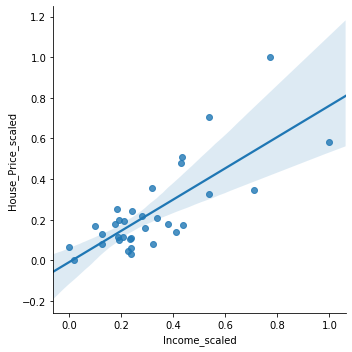

In [176]:
sns.lmplot(data=df_london_stats_scaled,x='Income_scaled',y='House_Price_scaled')

In [136]:
df_london_stats_scaled[['Income_scaled','House_Price_scaled']].corr()

,Income_scaled,House_Price_scaled
Income_scaled,1.000000,0.764771
House_Price_scaled,0.764771,1.000000


Correlation between the level of crime and the house price in a borough

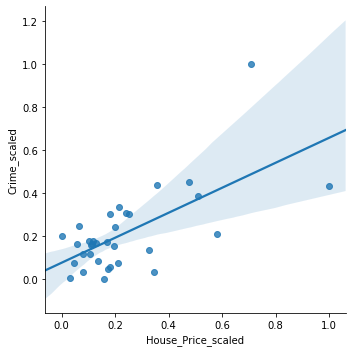

In [174]:
sns.lmplot(data=df_london_stats_scaled,x='House_Price_scaled',y='Crime_scaled')

## Load clean Airbnb data

In [16]:
df = pd.read_pickle('listings_features.pkl')

In [17]:
geometry = gpd.points_from_xy(df.longitude, df.latitude)
gdf = gpd.GeoDataFrame(df, geometry=geometry)

In [18]:
gpd.__version__

'0.6.1'

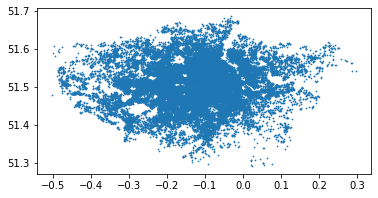

In [19]:
gdf.plot(markersize=0.5)

## Borough Pivot

In [112]:
borough_pivot = df.pivot_table(index="neighbourhood_cleansed",values="price",aggfunc=('count',np.mean,np.std))
borough_pivot

,count,mean,std
neighbourhood_cleansed,,,
Barking and Dagenham,333,62.663664,83.662192
Barnet,1551,85.782076,195.983907
Bexley,232,54.500000,51.194900
Brent,2420,89.813636,92.445720
Bromley,664,63.742470,55.519254
Camden,5858,145.637248,209.598857
City of London,462,175.645022,111.674902
Croydon,1064,63.655075,160.460815
Ealing,1652,79.578087,78.129011


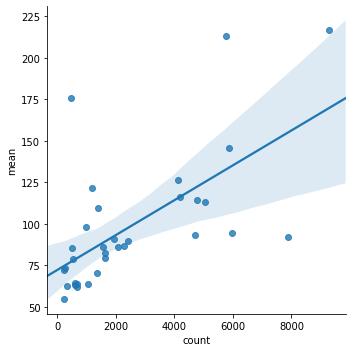

In [188]:
sns.lmplot(data=borough_pivot,x='count',y='mean')

In [111]:
borough_pivot_property = df.pivot_table(index="neighbourhood_cleansed",columns='room_type',values="price",aggfunc=('count'))
borough_pivot_property

room_type,Entire home/apt,Private room,Shared room
neighbourhood_cleansed,,,
Barking and Dagenham,102,226,5
Barnet,654,884,13
Bexley,65,164,3
Brent,1149,1228,43
Bromley,284,374,6
Camden,3934,1839,85
City of London,409,50,3
Croydon,368,686,10
Ealing,700,941,11


In [108]:
borough_pivot_property = df.pivot_table(index="neighbourhood_cleansed",columns='property_type_clean',values="price",aggfunc=('count'))
borough_pivot_property

property_type_clean,Apartment,Bed and breakfast,Condominium,Guest suite,House,Loft,Other,Serviced apartment,Townhouse
neighbourhood_cleansed,,,,,,,,,
Barking and Dagenham,123.0,8.0,3.0,2.0,173.0,1.0,5.0,4.0,14.0
Barnet,785.0,34.0,14.0,19.0,569.0,15.0,53.0,24.0,38.0
Bexley,68.0,5.0,1.0,3.0,130.0,1.0,8.0,2.0,14.0
Brent,1396.0,23.0,25.0,16.0,734.0,20.0,65.0,43.0,98.0
Bromley,254.0,17.0,2.0,8.0,258.0,2.0,38.0,64.0,21.0
Camden,4774.0,30.0,63.0,14.0,578.0,29.0,141.0,109.0,120.0
City of London,370.0,1.0,6.0,1.0,8.0,5.0,15.0,56.0,NaN
Croydon,461.0,33.0,12.0,11.0,442.0,4.0,36.0,26.0,39.0
Ealing,768.0,42.0,16.0,17.0,647.0,18.0,42.0,43.0,59.0


In [4]:
borough_df['wkb_geometry'] = borough_df['wkb_geometry'].apply(wkt.loads)
borough_df.head()

,ogc_fid,name,cartodb_id,created_at,updated_at,wkb_geometry
0,1,Barking and Dagenham,1,2015-07-01 10:57:45,2015-07-01 10:57:45,"(POLYGON ((0.148209 51.599635, 0.148199 51.599..."
1,2,Barnet,2,2015-07-01 10:57:45,2015-07-01 10:57:45,"(POLYGON ((-0.183361 51.668682, -0.183383 51.6..."
2,3,Bexley,3,2015-07-01 10:57:45,2015-07-01 10:57:45,"(POLYGON ((0.158044 51.509044, 0.156309 51.509..."
3,4,Brent,4,2015-07-01 10:57:45,2015-07-01 10:57:45,"(POLYGON ((-0.212138 51.555582, -0.212689 51.5..."
4,5,Bromley,5,2015-07-01 10:57:45,2015-07-01 10:57:45,"(POLYGON ((0.076463 51.430995, 0.075932 51.431..."


In [5]:
borough_gdf = gpd.GeoDataFrame(borough_df, geometry ="wkb_geometry" )

In [243]:
#listings_gdf = gpd.GeoDataFrame(df, geometry = 'loc')

## Join Table

In [179]:
merge_df = borough_pivot.merge(df_london_stats_scaled,left_on='neighbourhood_cleansed',right_on='Area name')
merge_df.columns

Index(['count', 'mean', 'std', 'Area name', 'Median House Price, 2015',
       'Population_scaled', 'Household_scaled', 'Density_scaled', 'Age_scaled',
       'Employment_scaled', 'Income_scaled', 'Crime_scaled',
       'House_Price_scaled', 'New_Homes_scaled', 'Satisfaction_scaled'],
      dtype='object')

In [180]:
merge_df = merge_df.set_index('Area name')

In [181]:
merge_df

,count,mean,std,"Median House Price, 2015",Population_scaled,Household_scaled,Density_scaled,Age_scaled,Employment_scaled,Income_scaled,Crime_scaled,House_Price_scaled,New_Homes_scaled,Satisfaction_scaled
Area name,,,,,,,,,,,,,,
Barking and Dagenham,333,62.663664,83.662192,243500.0,0.525735,0.474106,0.269411,0.127119,0.080000,0.018370,0.203454,0.000000,0.299652,0.539216
Barnet,1551,85.782076,195.983907,445000.0,1.000000,0.950632,0.172456,0.500000,0.260000,0.337256,0.076179,0.210664,0.554007,0.872549
Bexley,232,54.500000,51.194900,275000.0,0.618435,0.601298,0.138182,0.644068,0.700000,0.235649,0.008838,0.032933,0.000000,0.774510
Brent,2420,89.813636,92.445720,407250.0,0.849002,0.752988,0.410947,0.355932,0.326667,0.096441,0.175326,0.171197,0.411150,0.647059
Bromley,664,63.742470,55.519254,374975.0,0.837973,0.880223,0.000000,0.745763,0.713333,0.409874,0.084790,0.137454,0.289199,0.931373
Camden,5858,145.637248,209.598857,700000.0,0.613708,0.665835,0.668656,0.423729,0.306667,0.429679,0.451203,0.477261,0.383275,0.539216
City of London,462,175.645022,111.674902,799999.0,0.000000,0.000000,0.063263,1.000000,0.000000,1.000000,0.212800,0.581808,0.073171,0.000000
Croydon,1064,63.655075,160.460815,300000.0,0.991859,1.000000,0.170727,0.474576,0.720000,0.235936,0.164421,0.059070,0.756098,0.500000
Ealing,1652,79.578087,78.129011,430000.0,0.900210,0.828563,0.309915,0.406780,0.540000,0.209242,0.154797,0.194982,0.296167,0.686275


In [182]:
merge_df[['mean','House_Price_scaled']].corr()

,mean,House_Price_scaled
mean,1.000000,0.944528
House_Price_scaled,0.944528,1.000000


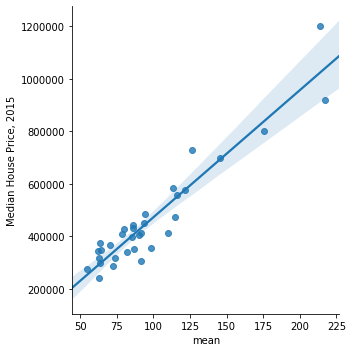

In [187]:
sns.lmplot(data=merge_df,x='mean',y='Median House Price, 2015')

In [186]:
merge_df[['mean','Median House Price, 2015']].corr()

,mean,"Median House Price, 2015"
mean,1.000000,0.944528
"Median House Price, 2015",0.944528,1.000000


## OLS of input data to estimate 

In [183]:
merge_df['mean_log'] = np.log(merge_df['mean'])

In [184]:
scalar = MinMaxScaler()
merge_df['mean_scaled'] = scalar.fit_transform(merge_df[['mean']])

In [152]:
X = merge_df[['Population_scaled', 'Household_scaled', 'Density_scaled',
       'Age_scaled', 'Employment_scaled', 'Income_scaled', 'Crime_scaled',
       'House_Price_scaled', 'New_Homes_scaled', 'Satisfaction_scaled']] 
y = merge_df['mean']
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

C:\Users\Miheer\AC3\envs\yuvoh\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mean   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     36.21
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           2.40e-11
Time:                        18:08:17   Log-Likelihood:                -120.80
No. Observations:                  33   AIC:                             263.6
Df Residuals:                      22   BIC:                             280.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  60.9492     25.720      2.370      0.027       7.610     114.289
Population_scaled      48.3396     80.675      0.599      0.555    -118.969     215.648
Household_scaled      -86.9960     81.002     -1.074      0.294    -254.983      80.991
Density_scaled        -10.5939     19.766     -0.536      0.597     -51.586      30.398
Age_scaled              3.5671     25.238      0.141      0.889     -48.774      55.908
Employment_scaled       5.9421     12.335      0.482      0.635     -19.640      31.524
Income_scaled          19.5564     33.803      0.579      0.569     -50.546      89.658
Crime_scaled           78.0678     26.968      2.895      0.008      22.140     133.996
House_Price_scaled    125.3630     39.461      3.177      0.004      43.525     207.201
New_Homes_scaled       28.6521     14.079      2.035      0.054      -0.546      57.850
Satisfaction_scaled     0.6909     16.805      0.041      0.968     -34.161      35.543
==============================================================================
Omnibus:                        0.759   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.684   Jarque-Bera (JB):                0.264
Skew:                           0.211   Prob(JB):                        0.876
Kurtosis:                       3.121   Cond. No.                         109.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
X = merge_df[['Population_scaled', 'Household_scaled', 'Density_scaled',
       'Age_scaled', 'Employment_scaled', 'Income_scaled', 'Crime_scaled',
       'House_Price_scaled', 'New_Homes_scaled', 'Satisfaction_scaled']] 
y = merge_df['mean_log']
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

C:\Users\Miheer\AC3\envs\yuvoh\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               mean_log   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     19.13
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           1.29e-08
Time:                        18:26:57   Log-Likelihood:                 26.271
No. Observations:                  33   AIC:                            -30.54
Df Residuals:                      22   BIC:                            -14.08
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.1130      0.298     13.787      0.000       3.494       4.732
Population_scaled       1.0372      0.936      1.108      0.280      -0.903       2.978
Household_scaled       -1.3850      0.940     -1.474      0.155      -3.334       0.564
Density_scaled          0.0608      0.229      0.265      0.793      -0.415       0.536
Age_scaled             -0.0737      0.293     -0.252      0.804      -0.681       0.533
Employment_scaled       0.1934      0.143      1.352      0.190      -0.103       0.490
Income_scaled           0.3778      0.392      0.964      0.346      -0.435       1.191
Crime_scaled            0.6344      0.313      2.028      0.055      -0.014       1.283
House_Price_scaled      0.9878      0.458      2.158      0.042       0.039       1.937
New_Homes_scaled        0.2822      0.163      1.728      0.098      -0.056       0.621
Satisfaction_scaled    -0.0600      0.195     -0.308      0.761      -0.464       0.344
==============================================================================
Omnibus:                        0.812   Durbin-Watson:                   2.215
Prob(Omnibus):                  0.666   Jarque-Bera (JB):                0.845
Skew:                           0.225   Prob(JB):                        0.655
Kurtosis:                       2.358   Cond. No.                         109.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
X = merge_df[['Population_scaled', 'Household_scaled', 'Density_scaled',
       'Age_scaled', 'Employment_scaled', 'Income_scaled', 'Crime_scaled',
       'House_Price_scaled', 'New_Homes_scaled', 'Satisfaction_scaled']] 
y = merge_df['mean_scaled']
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            mean_scaled   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     36.21
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           2.40e-11
Time:                        18:27:05   Log-Likelihood:                 47.175
No. Observations:                  33   AIC:                            -72.35
Df Residuals:                      22   BIC:                            -55.89
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0397      0.158      0.251      0.804      -0.289       0.368
Population_scaled       0.2976      0.497      0.599      0.555      -0.732       1.328
Household_scaled       -0.5356      0.499     -1.074      0.294      -1.570       0.499
Density_scaled         -0.0652      0.122     -0.536      0.597      -0.318       0.187
Age_scaled              0.0220      0.155      0.141      0.889      -0.300       0.344
Employment_scaled       0.0366      0.076      0.482      0.635      -0.121       0.194
Income_scaled           0.1204      0.208      0.579      0.569      -0.311       0.552
Crime_scaled            0.4806      0.166      2.895      0.008       0.136       0.825
House_Price_scaled      0.7718      0.243      3.177      0.004       0.268       1.276
New_Homes_scaled        0.1764      0.087      2.035      0.054      -0.003       0.356
Satisfaction_scaled     0.0043      0.103      0.041      0.968      -0.210       0.219
==============================================================================
Omnibus:                        0.759   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.684   Jarque-Bera (JB):                0.264
Skew:                           0.211   Prob(JB):                        0.876
Kurtosis:                       3.121   Cond. No.                         109.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Population_scaled is the most significant factor in determining the average listing price in a borough

## Maps

In [164]:
borough_map = borough_gdf.merge(df_london_stats,left_on ="name", right_on='Area name')
borough_map = borough_map.merge(borough_pivot,left_on ="name", right_on='neighbourhood_cleansed') 

In [166]:
borough_map.columns

Index(['ogc_fid', 'name', 'cartodb_id', 'created_at', 'updated_at',
       'wkb_geometry', 'Area name', 'GLA Population Estimate 2017',
       'GLA Household Estimate 2017', 'Population density (per hectare) 2017',
       'Average Age, 2017', 'Employment rate (%) (2015)',
       'Modelled Household median income estimates 2012/13',
       'Crime rates per thousand population 2014/15',
       'Median House Price, 2015', 'New Homes (net) 2015/16 (provisional)',
       'Life satisfaction score 2011-14 (out of 10)', 'Population_scaled',
       'Household_scaled', 'Density_scaled', 'Age_scaled', 'Employment_scaled',
       'Income_scaled', 'Crime_scaled', 'House_Price_scaled',
       'New_Homes_scaled', 'Satisfaction_scaled', 'count', 'mean', 'std'],
      dtype='object')

In [254]:
type(borough_avg_booked_geo)

geopandas.geodataframe.GeoDataFrame

[Text(0.5, 1, 'Heatmap avg price for London Boroughs')]

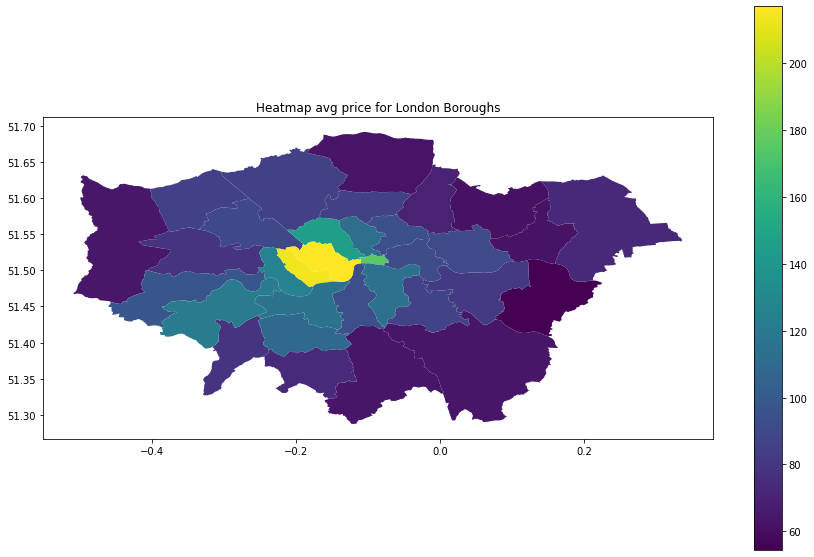

In [167]:
borough_map.plot(column="mean", legend=True, figsize=(15,10)).set(title="Heatmap avg price for London Boroughs") 

[Text(0.5, 1, 'Heatmap avg price for London Boroughs')]

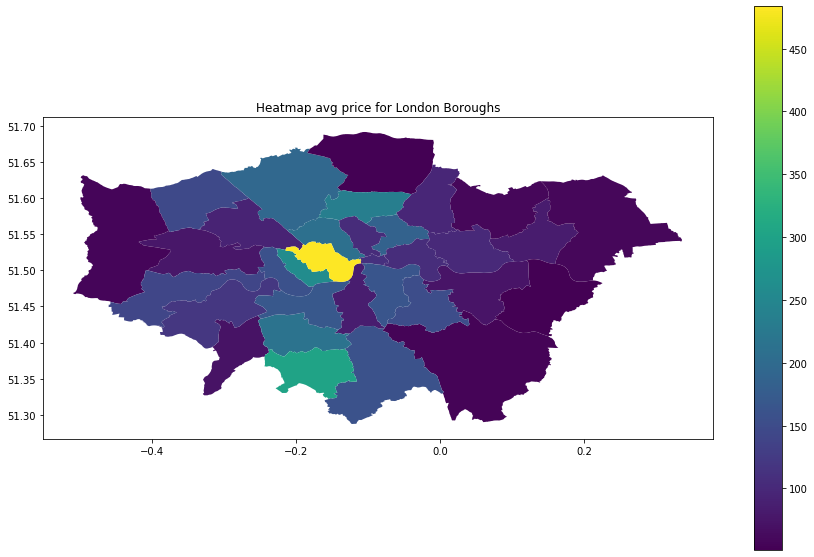

In [170]:
borough_map.plot(column="std", legend=True, figsize=(15,10)).set(title="Heatmap avg price for London Boroughs") 

[Text(0.5, 1, 'Heatmap avg price for London Boroughs')]

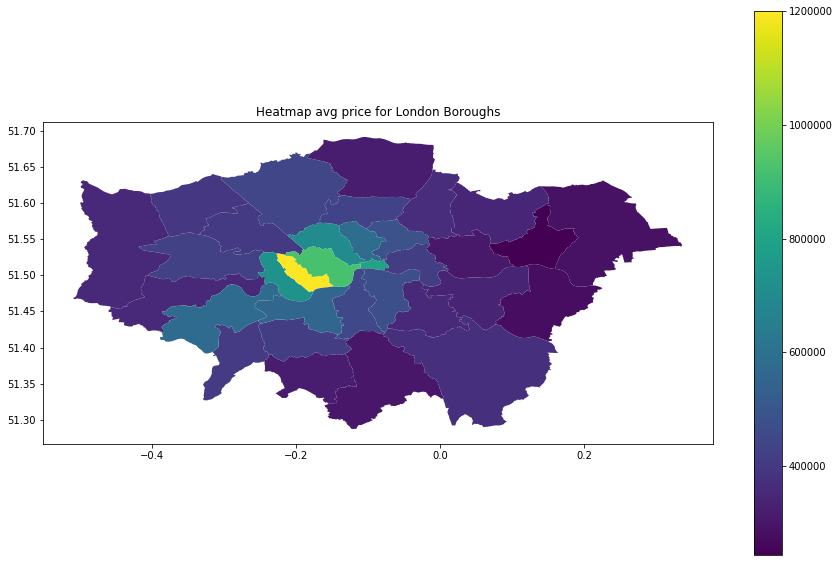

In [171]:
borough_map.plot(column="Median House Price, 2015", legend=True, figsize=(15,10)).set(title="Heatmap avg price for London Boroughs") 

[Text(0.5, 1, 'Heatmap avg price for London Boroughs')]

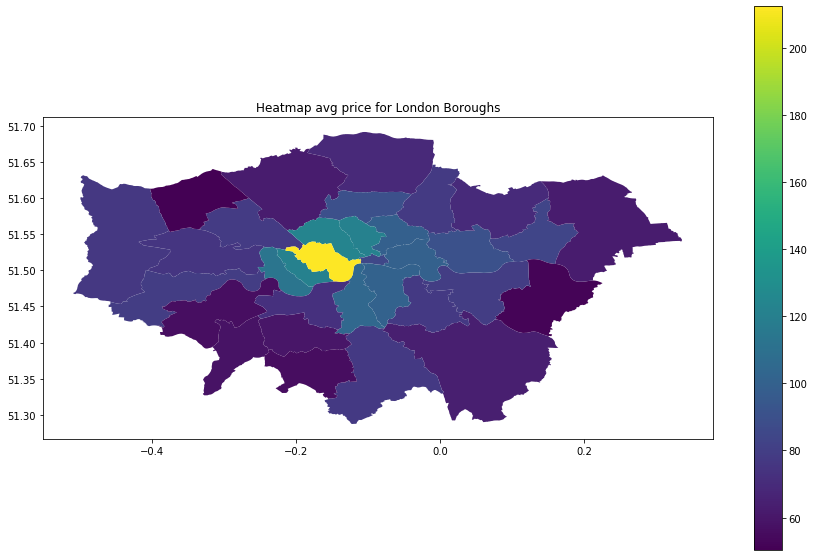

In [172]:
borough_map.plot(column="Crime rates per thousand population 2014/15", legend=True, figsize=(15,10)).set(title="Heatmap avg price for London Boroughs") 